# Matplotlib使用详解VI
## 自定义图像标注

图像标注赋予了可视化的意义，赋予了各种图像要素的意义。

我们之前看到过如何创造一个简单的标签;在这里，我们将讨论在Matplotlib中自定义图例的放置和美观。

最简单的图例可以用``plt.legend()``命令创建，该命令自动为任何标记的图像元素创建一个图例:

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [2]:
%matplotlib inline
import numpy as np

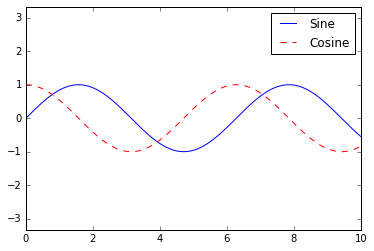

In [3]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

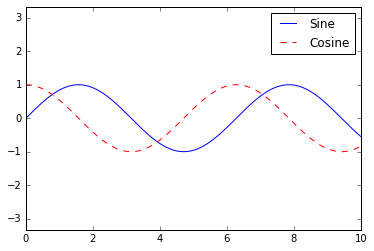

In [4]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
ax.legend();

但我们有很多方法可以定制这样一个标签。例如，我们可以指定位置和关闭框架:

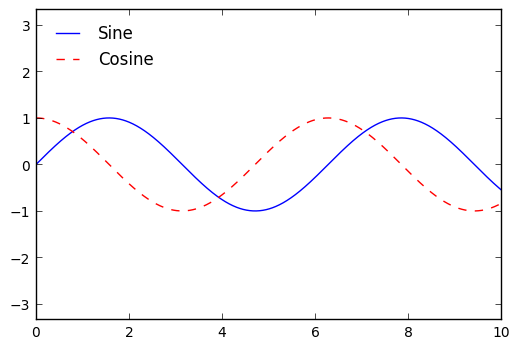

In [4]:
ax.legend(loc='upper left', frameon=False)
fig

我们可以使用``ncol``命令来指定图例中的列数:

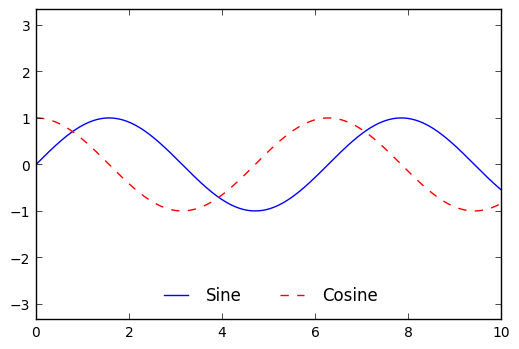

In [5]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

我们可以使用一个圆形的框 (``fancybox``)或添加一个阴影，改变框架的透明度(alpha值)，或改变文本周围的填充:

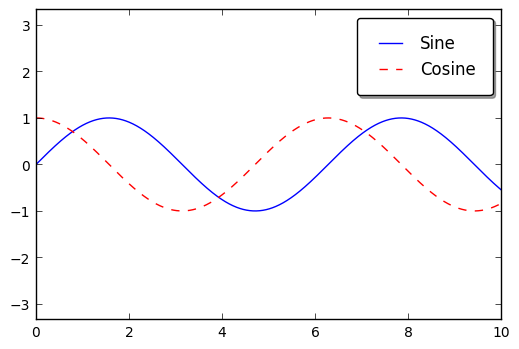

In [6]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

有关可用的图例选项的更多信息，请参见``plt.legend``解释。

 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> 练习 1:</h1>
<b>仿照上文的教学，创建y为2000个0到20之间等间隔的数，并绘制其sin、cos函数图，将标注放到右上角。</b>
</div>

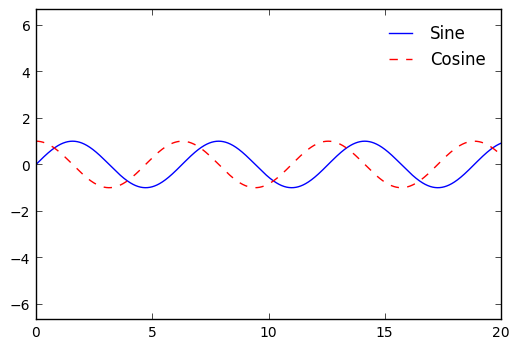

In [7]:
y = np.linspace(0, 20, 2000)
fig, ax = plt.subplots()
ax.plot(y, np.sin(y), '-b', label='Sine')
ax.plot(y, np.cos(y), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend()
ax.legend(loc='upper right', frameon=False)

 <div align="right">
<a href="#q1" class="btn btn-default" data-toggle="collapse">点击获取答案</a>

</div>
<div id="q1" class="collapse">

```
代码：
y = np.linspace(0, 20, 2000)
fig, ax = plt.subplots()
ax.plot(y, np.sin(y), '-b', label='Sine')
ax.plot(y, np.cos(y), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend()
ax.legend(loc='upper right', frameon=False)

```

</div>



 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> 练习 2:</h1>
<b>仿照上文的教学，创建y为2000个0到1之间等间隔的数，并绘制其tan函数图，将标注放到右上角</b>
</div>

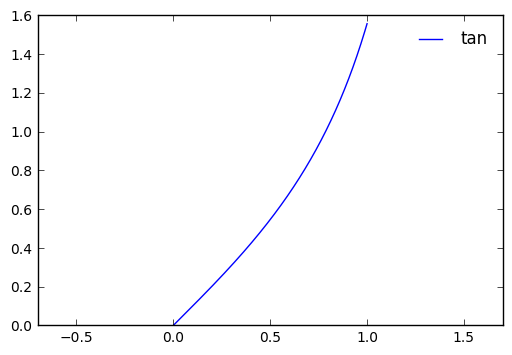

In [8]:
y = np.linspace(0, 1, 2000)
fig, ax = plt.subplots()
ax.plot(y, np.tan(y), '-b', label='tan')
ax.axis('equal')
leg = ax.legend()
ax.legend(loc='upper right', frameon=False)

 <div align="right">
<a href="#q2" class="btn btn-default" data-toggle="collapse">点击获取答案</a>

</div>
<div id="q2" class="collapse">
```
代码：
y = np.linspace(0, 1, 2000)
fig, ax = plt.subplots()
ax.plot(y, np.tan(y), '-b', label='tan')
ax.axis('equal')
leg = ax.legend()
ax.legend(loc='upper right', frameon=False)
    

```
</div>



## 为标注选择元素
正如我们已经看到的那样，这个标签在默认情况下包含了所有被标记的元素。

如果这不是我们想要的，我们可以通过使用plot命令返回的对象来调整这个传说中的元素和标注。

``plt.plot()``命令可以同时创建多个行，并返回创建的行实例列表。

将其中的任何一项传递给``plt.legend()``，将告诉它要识别哪些标签，以及我们想要说明的标注:

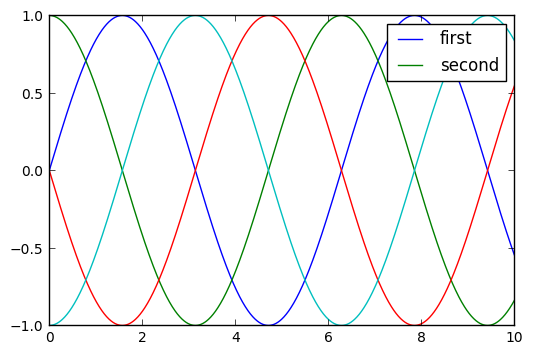

In [9]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second']);

我通常在实践中发现，使用第一种方法更清楚，将标签应用于你想要在图例上展示的情节元素:

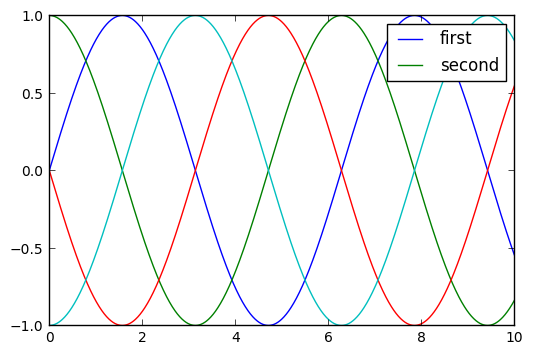

In [10]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True);

注意，在默认情况下，标注忽略了没有``label``属性集的所有元素。

## 多个标注

有时候，在设计一个图像时，你想要在同一个坐标轴上添加多个标注。

不幸的是，Matplotlib并没有做到这一点:通过标准的``legend``界面，只可能为整个图像创造一个单一的标注。

如果你试图用``plt.legend()``或``ax.legend()``来创建第二个标注，它将简单地覆盖第一个。

我们可以通过从头创建一个新的标注图像来解决这个问题，然后使用较低层次的 ``ax.add_artist()``方法手动添加第二个图像到绘图区:

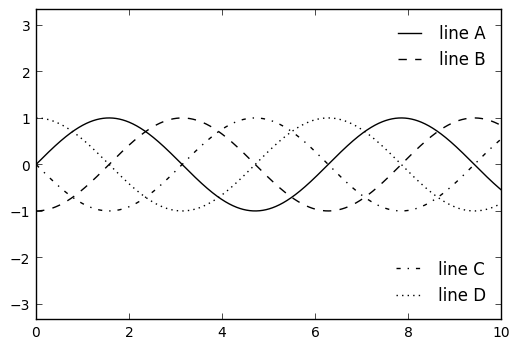

In [11]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

# 指定第一个图例的线条和标签
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

# 创建第二个图例并手动添加图像
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg);

 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> 练习 3:</h1>
<b>对上面的图像进行修改，将“line A”和“line B”放置在左上角，“line C”和“line D”放置在左下角，并将线条颜色改为红色。</b>
</div>

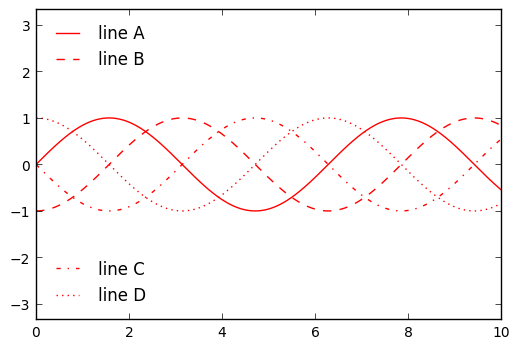

In [12]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='red')
ax.axis('equal')

ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper left', frameon=False)

from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower left', frameon=False)
ax.add_artist(leg);

 <div align="right">
<a href="#q3" class="btn btn-default" data-toggle="collapse">点击获取答案</a>

</div>
<div id="q3" class="collapse">
```
代码：
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='red')
ax.axis('equal')

ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper left', frameon=False)

from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower left', frameon=False)
ax.add_artist(leg);
    

```
</div>



这是对包含任何Matplotlib图的低级图像对象的一瞥。

如果检查``ax.legend()``的源代码(回想一下,你可以在IPython notebook使用``ax.legend??``)你会发现函数简单地由一些逻辑创建一个合适的“标注”图像,然后保存在``legend_``属性和添加到图像当中。